# Pymaceuticals Inc.
---

### Analysis

This is a study done by Pymaceuticals to evaluate the efficacy of specific anti-cancer medication on Squamous Cell Carcinoma(SCC). A total of 248 mice that had SCC were randomised to various drug regimens and the efficacy of the regimen assessed by evaluating the tumor volume (in mm3) at various time points and the presence or abscence of metastatic sites. Mice of varying sex, age and weight were studied. There was almost an equal distribition by sex(males:51% and Females:49%). 

The mean, median, variance and standard deviation of the Tumor volume was determined for each drug regimen as shown in the table(Summary_df) below. The study then narrowed its focus to 4 main drugs-Capomulin, Ramicane, Infubinol, Ceftamin. The tumor volume data for each of these drugs were normally distributed with the exception of Infubinol, which had one outlier.

Further analysis were done on mice randomised to the Capomulin regimen. The final tumor volume at the highest timepoint was determined for each mouse on the Capomulin regimen.

A single mouse on this regimen was selected and the tumor growth pattern assessed by evaluating the tumor volume at each timepoint over the study period. This is illustrated by the line graph below that shows an initial increase in tumor volume, followed by a sharp decline in volume. However, the tumor volume begins to rise again slowly, towards the end of the period of study. Capomulin is thus an effective drug but may require upward dose adjustments over time. 

It was also noticed that a strongly positive corelation(p-value = 0.84) existed between the weight of the mouse and its average tumor size. Hence the bigger the mouse, the bigger its tumor was. Further studies may be required to determine if weight of the mouse has any direct influence on the drug efficacy.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_df = pd.merge(study_results,mouse_metadata, on = "Mouse ID", how = "left")

# Display the data table for preview
study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count = study_df["Mouse ID"].nunique()
mice_count

249

In [41]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates = study_df.duplicated(subset=["Mouse ID","Timepoint"], keep="last")
duplicate_mice_df= study_df[duplicates]["Mouse ID"].unique()
duplicate_mice_df


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice= study_df.loc[study_df["Mouse ID"]=="g989"]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_study = study_df.loc[study_df["Mouse ID"]!="g989",:]
cleaned_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
second_mice_count = cleaned_study["Mouse ID"].nunique()
second_mice_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary = cleaned_study.groupby("Drug Regimen")

mean_df = summary["Tumor Volume (mm3)"].mean()
median_df = summary["Tumor Volume (mm3)"].median()
var_df = summary["Tumor Volume (mm3)"].var()
std_df = summary["Tumor Volume (mm3)"].std()
SEM = (summary["Tumor Volume (mm3)"]).sem()

summary_df = pd.DataFrame({"Mean Tumor Volume":mean_df,
                           "Median Tumor Volume":median_df,
                           "Tumor Volume Variance":var_df,
                           "Tumor Volume Std. Dev.":std_df,
                           "Tumor Volume Std. Err.":SEM})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = pd.DataFrame(summary["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"]))
summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

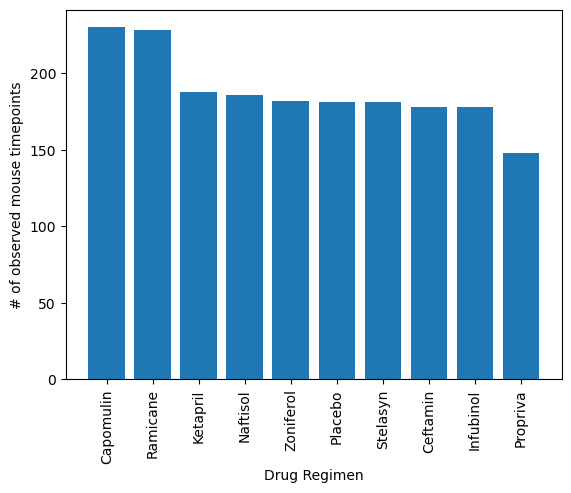

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

mouse_timepoints= pd.DataFrame(summary["Timepoint"].count())
mouse_timepoints=mouse_timepoints.sort_values(by =["Timepoint"], ascending = False)
mouse_timepoints.plot(kind = "bar", ylabel = "# of Observed Mouse Timepoints")
regroup = cleaned_study.groupby(["Drug Regimen"]).count()
regrouped= regroup.sort_values(["Timepoint"], ascending = False)

x_axis=range(len(regrouped))
ticklocations = [value for value in x_axis]
plt.xticks(ticklocations, regrouped.index, rotation = "vertical")
plt.bar(x_axis,regrouped["Timepoint"],align="center", alpha= 1)
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed mouse timepoints")

plt.show()


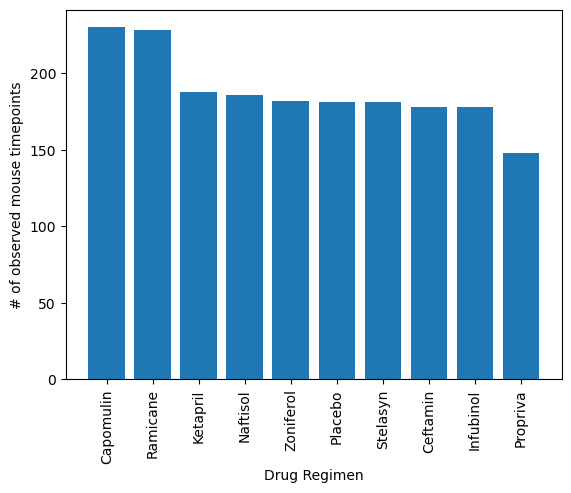

In [48]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

regroup = cleaned_study.groupby(["Drug Regimen"]).count()
regrouped= regroup.sort_values(["Timepoint"], ascending = False)

x_axis=range(len(regrouped))
ticklocations = [value for value in x_axis]
plt.xticks(ticklocations, regrouped.index, rotation = "vertical")
plt.bar(x_axis,regrouped["Timepoint"],align="center", alpha= 1)
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed mouse timepoints")

plt.show()


<Axes: ylabel='Sex'>

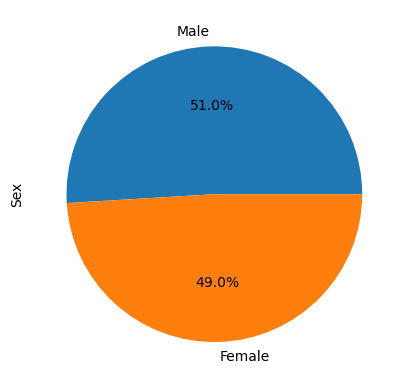

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
cleaned_study["Sex"].value_counts().plot(kind="pie",autopct="%1.1f%%") 


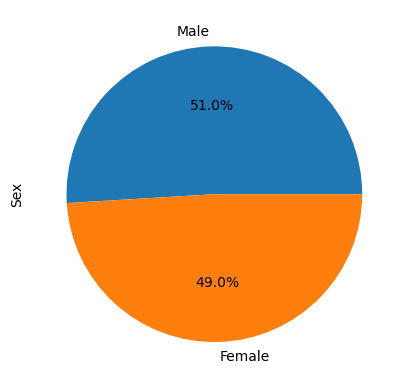

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sizes= cleaned_study["Sex"].value_counts()
labels = ["Male", "Female"]
plt.pie(sizes,labels= labels,autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [43]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
maxtime = cleaned_study.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_volume= pd.merge(maxtime,cleaned_study,on=["Mouse ID","Timepoint"],how="inner")
max_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [44]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol={"Capomulin":[],"Ramicane":[],"Infubinol":[],"Ceftamin":[]}

      
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
for name in treatments:
    specific_drug = max_volume.loc[max_volume["Drug Regimen"]==name,"Tumor Volume (mm3)"]
    tumor_vol[name]=specific_drug                                     
 
    # Determine outliers using upper and lower bounds
    quantiles= specific_drug.quantile([0.25,0.5,0.75])
    upperq= quantiles[0.75]
    lowerq = quantiles[0.25]  
    IQR= upperq- lowerq

    upperbound= upperq + (1.5*IQR)
    lowerbound= lowerq - (1.5*IQR)
    outliers= specific_drug.loc[(specific_drug < lowerbound)|(specific_drug > upperbound)]
    print(outliers)

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


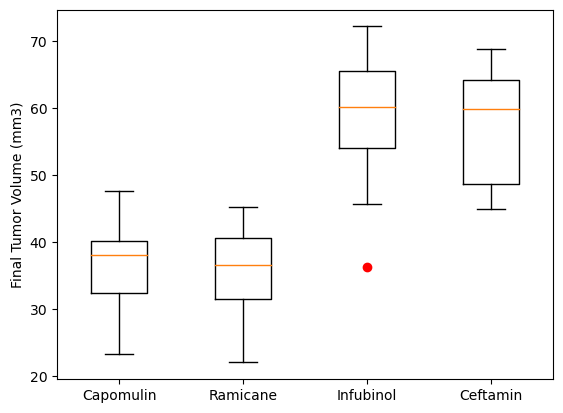

In [45]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data= [values for values in tumor_vol.values()]
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(data, sym = "ro")
ax1.set_xticklabels(tumor_vol.keys())
plt.show()

## Line and Scatter Plots

<Axes: title={'center': 'Capomulin treatment of mouse l509'}, xlabel='Timepoint(Days)', ylabel='Tumor Volume(mm3)'>

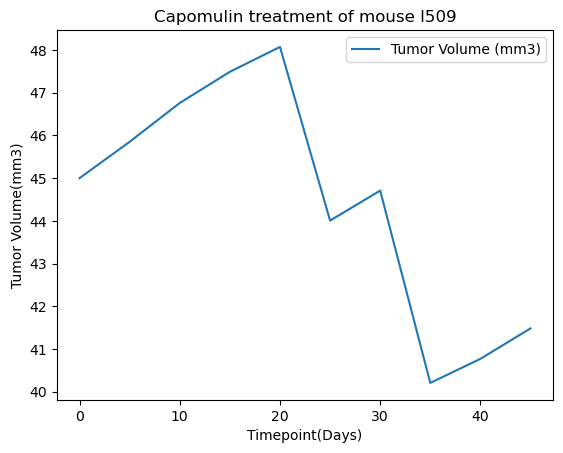

In [28]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse= cleaned_study.loc[cleaned_study["Mouse ID"]=="l509"]
mouse_data=pd.DataFrame(mouse[["Tumor Volume (mm3)","Timepoint"]])
mouse_data = mouse_data.set_index("Timepoint")
mouse_data.plot(xlabel="Timepoint(Days)", ylabel= "Tumor Volume(mm3)",title= "Capomulin treatment of mouse l509")

C:\Users\andre\AppData\Local\Temp\ipykernel_41924\785228675.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_df= capomulin_df.groupby(["Mouse ID"])["Weight (g)","Tumor Volume (mm3)"].mean()


<Axes: xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

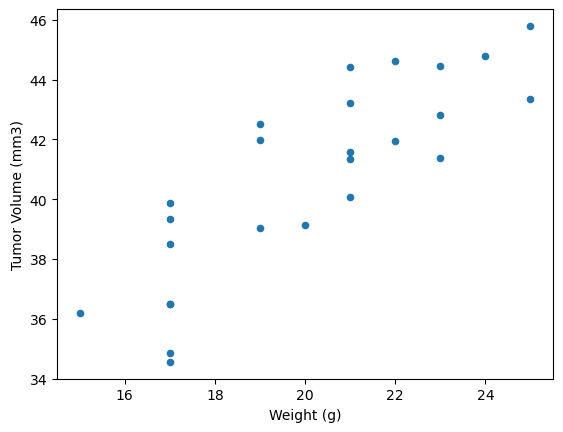

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = cleaned_study.loc[cleaned_study["Drug Regimen"]=="Capomulin"]
data_df= capomulin_df.groupby(["Mouse ID"])["Weight (g)","Tumor Volume (mm3)"].mean()
data_df.plot(kind= "scatter",x="Weight (g)", y="Tumor Volume (mm3)")

## Correlation and Regression

The correlation betwwen mouse weight and the average tumor volume is 0.84


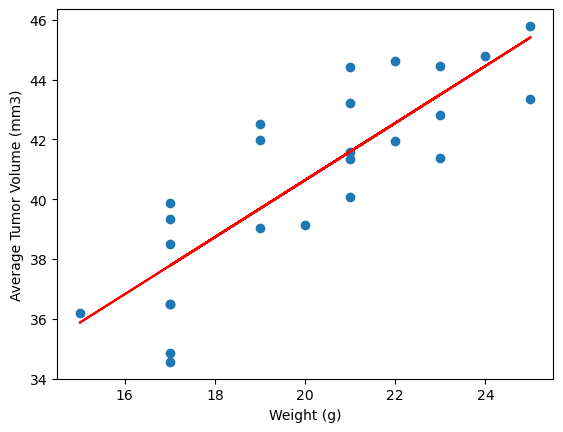

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation= st.pearsonr(data_df["Weight (g)"],data_df["Tumor Volume (mm3)"])
print(f'The correlation betwwen mouse weight and the average tumor volume is {round(correlation[0],2)}')

x_values = data_df["Weight (g)"]
y_values = data_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()